# movie Recommendation model 

In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df = pd.read_csv('movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
dd =df.copy(deep=True)
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
#بجرب حاجة مش مهم
dd = dd[~dd['rating'].isin(['Not Rated', 'Unrated'])]
dd = dd.drop(['released','name'],axis=1)
numeric = dd.select_dtypes(include='number').columns
dd[numeric] = dd[numeric].fillna(dd[numeric].median())
dd = dd.dropna()

for x in dd.columns:
     if (dd[x].dtype == 'object'):
        dd[x] = dd[x].astype('category')
        dd[x] = dd[x].cat.codes

dd

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,5,6,1980,8.4,927000.0,2407,3781,950,51,19000000.0,46998772.0,2075,146.0
1,5,1,1980,5.8,65000.0,2115,1553,293,52,4500000.0,58853106.0,646,104.0
2,3,0,1980,8.7,1200000.0,1035,2427,1583,52,18000000.0,538375067.0,1385,124.0
3,3,4,1980,7.7,221000.0,1210,1896,2034,52,3500000.0,83453539.0,1621,88.0
4,5,4,1980,7.3,108000.0,986,487,369,52,6000000.0,39846344.0,1590,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,3,1,2020,6.8,42000.0,415,2794,871,6,135000000.0,111105497.0,14,100.0
7653,5,5,2020,5.4,2400.0,2343,3653,2209,52,21000000.0,3661.0,1707,98.0
7656,4,4,2020,5.0,294.0,2338,3646,2155,52,21000000.0,413378.0,1709,120.0
7658,5,6,2020,6.6,35.0,1645,1015,482,52,5000.0,21577624.0,1564,78.0


In [6]:
#minmax = MinMaxScaler().fit_transform(dd)
#dd = pd.DataFrame(minmax, columns=dd.columns)

In [7]:
#fig, axs = plt.subplots(figsize=(18, 7))
#sns.kdeplot(data=dd.iloc[:, 3], ax=axs, shade=True)
#plt.show()

In [8]:
df = df.drop(['released','writer','company','director','star','country','name'], axis=1)
df = df[~df['rating'].isin(['Not Rated', 'Unrated'])]
df

,rating,genre,year,score,votes,budget,gross,runtime
0,R,Drama,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,R,Adventure,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,PG,Action,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,PG,Comedy,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,R,Comedy,1980,7.3,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...,...,...
7663,NaN,Drama,2020,3.1,18.0,7000.0,NaN,90.0
7664,NaN,Comedy,2020,4.7,36.0,NaN,NaN,90.0
7665,NaN,Drama,2020,5.7,29.0,58750.0,NaN,NaN
7666,NaN,Drama,2020,NaN,NaN,15000.0,NaN,120.0


In [9]:
unique_values = df.apply(pd.Series.nunique)
print(unique_values)

rating       10
genre        19
year         41
score        72
votes       920
budget      401
gross      7167
runtime     131
dtype: int64


In [10]:
#dir(df)
#for x in df.columns :
 #print(df[x].value_counts(normalize=True)*100)

In [11]:
for x in df.columns :
    if df[x].dtype == 'object' :
     unique = df[x].unique()
     print(f"cloumn name : {x}, values : {unique}")

cloumn name : rating, values : ['R' 'PG' 'G' nan 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'X' 'TV-MA' 'TV-14']
cloumn name : genre, values : ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Western'
 'Thriller' 'History' 'Mystery' 'Sport' 'Musical']


In [12]:
missing_count = df.isnull().sum()
missing_count[0:13]

rating       77
genre         0
year          0
score         3
votes         3
budget     1902
gross       160
runtime       4
dtype: int64

In [13]:
#df.fillna(df.median(), inplace=True)
numeric = df.select_dtypes(include='number').columns
df[numeric] = df[numeric].fillna(df[numeric].median())
df = df.dropna()
df

,rating,genre,year,score,votes,budget,gross,runtime
0,R,Drama,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,R,Adventure,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,PG,Action,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,PG,Comedy,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,R,Comedy,1980,7.3,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...,...,...
7653,R,Crime,2020,5.4,2400.0,21000000.0,3661.0,98.0
7655,TV-PG,Animation,2020,6.6,1300.0,21000000.0,240663149.0,110.0
7656,PG-13,Comedy,2020,5.0,294.0,21000000.0,413378.0,120.0
7658,R,Drama,2020,6.6,35.0,5000.0,21577624.0,78.0


In [14]:
df['rating'].value_counts()

R           3697
PG-13       2112
PG          1252
G            153
NC-17         23
TV-MA          9
TV-PG          5
X              3
Approved       1
TV-14          1
Name: rating, dtype: int64

In [15]:
co = df.corr()
co

,year,score,votes,budget,gross,runtime
year,1.000000,0.107039,0.240247,0.310201,0.275414,0.110885
score,0.107039,1.000000,0.430667,0.073455,0.201928,0.402633
votes,0.240247,0.430667,1.000000,0.457759,0.632664,0.335088
budget,0.310201,0.073455,0.457759,1.000000,0.745712,0.297145
gross,0.275414,0.201928,0.632664,0.745712,1.000000,0.265793
runtime,0.110885,0.402633,0.335088,0.297145,0.265793,1.000000


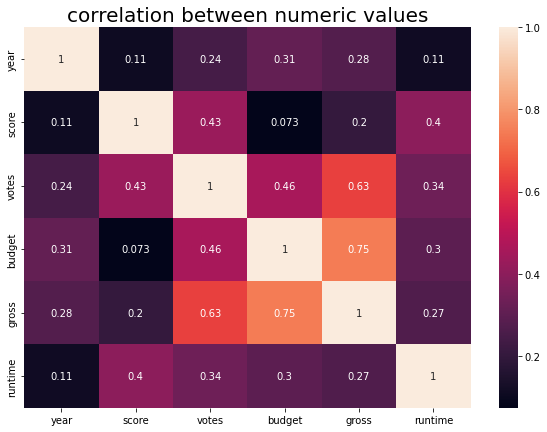

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(co,annot=True)
plt.title('correlation between numeric values',fontsize=20)
plt.show()

In [17]:
#string_cols = ['rating', 'genre']
encoded_data = pd.get_dummies(df['genre'])
data_2 = pd.concat([df, encoded_data], axis=1)
data_2.drop('genre', axis=1, inplace=True)

data_2

,rating,year,score,votes,budget,gross,runtime,Action,Adventure,Animation,...,Family,Fantasy,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
0,R,1980,8.4,927000.0,19000000.0,46998772.0,146.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,R,1980,5.8,65000.0,4500000.0,58853106.0,104.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PG,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PG,1980,7.7,221000.0,3500000.0,83453539.0,88.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,R,1980,7.3,108000.0,6000000.0,39846344.0,98.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,R,2020,5.4,2400.0,21000000.0,3661.0,98.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7655,TV-PG,2020,6.6,1300.0,21000000.0,240663149.0,110.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7656,PG-13,2020,5.0,294.0,21000000.0,413378.0,120.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7658,R,2020,6.6,35.0,5000.0,21577624.0,78.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_2.dtypes

rating        object
year           int64
score        float64
votes        float64
budget       float64
gross        float64
runtime      float64
Action         uint8
Adventure      uint8
Animation      uint8
Biography      uint8
Comedy         uint8
Crime          uint8
Drama          uint8
Family         uint8
Fantasy        uint8
Horror         uint8
Music          uint8
Mystery        uint8
Romance        uint8
Sci-Fi         uint8
Sport          uint8
Thriller       uint8
Western        uint8
dtype: object

In [19]:
hh = data_2.select_dtypes(include=['uint8']).columns
data_2[hh] = data_2[hh].astype(int)

In [27]:
y_label = "rating" 
y = data_2["rating"]
x = data_2.drop(y_label,axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
RF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, max_features='sqrt', random_state=42)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, max_depth=5, max_features='sqrt', random_state=42)

In [29]:
DT.fit(x_train,y_train)
print (DT.score(x_test,y_test))
RF.fit(x_train,y_train)
print (RF.score(x_test,y_test))
GB.fit(x_train,y_train)
print (GB.score(x_test,y_test))

0.5867768595041323
0.6232782369146006
0.6363636363636364


In [23]:
VC = VotingClassifier(estimators=[('rf',RF), ('dt',DT),
                                  ('gb',GB)], voting ='hard',
                     verbose=True,n_jobs=-1)
VC.fit(x_train,y_train)
VC.score(x_test,y_test)

0.6260330578512396

In [24]:
BC = BaggingClassifier(base_estimator=RF, n_estimators=100, max_samples=0.8, max_features=0.8,n_jobs=-1)
BC.fit(x_train, y_train)
BC.score(x_test, y_test)

0.6191460055096418

In [ ]:
AB = AdaBoostClassifier(base_estimator=RF,n_estimators=100,random_state=42)
AB.fit(x_train, y_train)
AB.score(x_test,y_test)